## How to Develop Word Embeddings with Gensim.

Modern Embedding algorithms like Word2Vec and GloVe can be used on Natural Language Processing problems like Machine Translation.

#### 1. Word Embeddings.

In word embeddings, we are trying to provide a dense vector representation of words that capture something about their meaning.

They are an improvement over simpler bag of words model encoding schemses like word counts and frequencies that result in large and sparce vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. 
Each word is repesented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word. This process of defining a word by the company it keeps that allows the word embeddings to learn something about the meaning of the words.

This means words with similar meanings are locally clustered within the space.

#### 2. Gensim Library.

This is an open-source library for NLP, with a focus on topic modeling. It is not like the NLTK library, instead it is a focused an efficient suite of NLP tools for topic modeling.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

In [1]:
# install gensim
!pip install -U gensim

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.2 MB 1.3 MB/s eta 0:00:01     |████████████████▋               | 12.5 MB 1.5 MB/s eta 0:00:08
     |████████████████████████████████| 99 kB 3.8 MB/s eta 0:00:011
     |████████████████████████████████| 128 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 2.6 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90632 sha256=99ebf569e94197d9763921bf41d2ed7a8d89191458ec46d8836db0c5c124f6aa
  Stored in directory: /home/michael/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
  Created wheel for googleapis-common-p

#### 3. Develop Word2Vec Embeddings.

There are 2 Word2Vec algorithms namely the Continuous Bag-of-Words and the Skip-Gram, both of which require a lot of text. 

Learning a word embedding using the Word2Vec class in Gensim involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance.

Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case). 

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora. There are quite a number of parameters in this constructor, some we may wish to configure are:
    
    1. size: (default 100) The number of dimensions in the embedding, eg. the length of the dense vector to represent each token.
        
    2. window: (default 5) The maximum distance between a target word and words around the target word.
        
    3. min_count: (default 5) The minimum count of words to consider when training the model: words with an occurence less than this count will be ignored.
            
    4. workers: (default 3) The number of threads to use while training.
        
    5. sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).
    
Let's take a small worked example.

In [2]:
# Load modules
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile

In [41]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], 
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'], 
             ['one' ,'more', 'sentence'], 
             ['and', 'the', 'final', 'sentence']]

# train a model
path = get_tmpfile("Models/word2vec.model")
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [42]:
# Summarize the vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [43]:
# Access the vector for one word
print(model.wv['sentence'])

[ 2.4445585e-03 -4.0116808e-03  9.8356616e-04 -1.1523644e-03
  4.5054639e-03  2.4449022e-03 -2.3396038e-03 -4.1663307e-03
  2.9676219e-03  2.4469018e-03 -2.0692858e-03  4.3152613e-03
  3.7573215e-03  3.9155057e-05  6.9033972e-04 -1.5007168e-03
  3.2499444e-03 -1.2384851e-03 -4.0207501e-03  2.8744114e-03
  9.7144727e-04  3.7244020e-03  8.9405745e-04 -1.7689941e-03
 -8.7716896e-04  3.7607455e-03 -1.6332819e-03 -1.4383604e-03
 -4.4988231e-03  8.0528739e-04 -3.9712316e-03  4.6293773e-03
 -1.3304424e-03  1.4792872e-03  1.2532071e-03  2.0937026e-03
  5.6169560e-04  3.1592953e-03  3.0715705e-03  3.7911534e-03
  2.7528792e-03 -4.7004339e-03 -1.5779417e-03 -2.8022309e-03
  4.0371749e-03 -1.0465648e-03 -1.0306865e-03 -4.4579511e-03
 -6.7581254e-04 -3.4397810e-03  2.3266107e-03 -1.9121204e-03
 -3.1571425e-04 -6.9215597e-04 -6.5398926e-04  4.0930277e-03
  3.6619427e-03 -1.4072107e-03 -2.0808559e-03 -1.4185984e-04
  2.2093847e-03 -1.9525071e-03 -2.7522151e-03  2.6156625e-03
  3.3582798e-03 -1.22452

In [44]:
# Save the model
model.save("Models/word2vec.model") # or we could save to 'model_wv.bin' then remove binary=False

In [68]:
# Load model
new_model = Word2Vec.load("Models/word2vec.model")
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
# Train a previous word embedding model on a new sentence.
new_model.train([["hello", "world"]], total_examples=1, epochs=1)

#### 4. Visualize Word Embeddings.

After learning word embeddings for your data, it can be nice to explore it with visualizations. You can use classical projection methods to reduce the high-dimensional vectors to two dimensional plots and plot them on a graph. The visualizations can provide a qualitative diagnostic for your learned model.

Let's retrieve all the vectors from a trained model:

In [37]:
# Load modules
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [69]:
# Fit a 2d PCA model to the vectors
X = new_model.wv[new_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [72]:
result.shape

(14, 2)

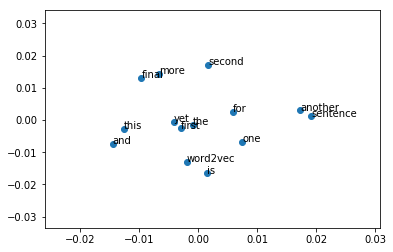

In [40]:
# Create a scatter plot of the pojection 
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

TO DO:
    
    Try on Truncated SVD and T-SNE instead of PCA

In [70]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [71]:
X_embedded.shape

(14, 2)

In [74]:
for i, word in enumerate(words):
    print(i, word)
    break

0 the


IndexError: index 14 is out of bounds for axis 0 with size 14

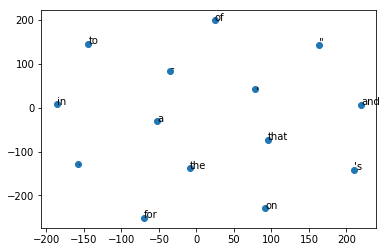

In [75]:
# Create a scatter plot of the pojection 
pyplot.scatter(X_embedded[:, 0], X_embedded[:, 1])
#words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(X_embedded[i, 0], X_embedded[i, 1]))
pyplot.show()

In [76]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
res = svd.fit_transform(X)

IndexError: index 14 is out of bounds for axis 0 with size 14

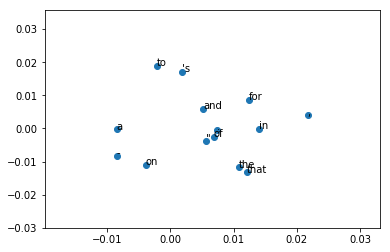

In [77]:
# Create a scatter plot of the pojection 
pyplot.scatter(res[:, 0], res[:, 1])
#words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(res[i, 0], res[i, 1]))
pyplot.show()

In [ ]:
Turns out TSNE and Truncated SVD dont work as well as PCA for data like this.

#### 5. Load Google's Word2Vec Embedding.

Training your own word vectors may be the best approach for a given NLP problem. But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm. An alternative is to simply use an existing pre-trained word embedding.

A pre-trained model is nothing more tha a file containing tokens and their associated word vectors.
The pre-trained Google Word2Vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

In [46]:
# Download the embeddings 
!wget -O Models/GoogleNews_vectors_negative300.bin.gz https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

--2020-03-29 16:08:27--  https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
Resolving drive.google.com (drive.google.com)... 216.58.223.78, 2a00:1450:401a:804::200e
Connecting to drive.google.com (drive.google.com)|216.58.223.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Models/GoogleNews_vectors_negative300.bin.gz’

Models/GoogleNews_v     [ <=>                ]  67.26K  --.-KB/s    in 0.1s    

2020-03-29 16:08:29 (474 KB/s) - ‘Models/GoogleNews_vectors_negative300.bin.gz’ saved [68879]



In [49]:
!ls Models

GoogleNews-vectors-negative300.bin  model_wv.bin  model_wv.txt	word2vec.model


In [48]:
# unzip the file downloaded. Alternatively use the gensim loader to download the file
!gunzip Models/GoogleNews-vectors-negative300.bin.gz


# def load_word2vec():
#     """ Load Word2Vec Vectors
#         Return:
#             wv_from_bin: All 3 million embeddings, each lengh 300
#     """
#     import gensim.downloader as api
#     wv_from_bin = api.load("word2vec-google-news-300")
#     vocab = list(wv_from_bin.vocab.keys())
#     print("Loaded vocab size %i" % len(vocab))
#     return wv_from_bin

In [50]:
# Load gensim keyed vectors to take the binary vectors file.
from gensim.models import KeyedVectors

In [51]:
# Load the google model
filename = 'Models/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

We can try some tests to see our how our model works with predicting most similar words given a word.

In [52]:
# Calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.711819589138031)]


This is how we'd load and use the google word embedding. for our various problems. Now let's extract the loaded embedding from memory since we'll have to load on the next embedding. If we were working from the cloud vm instance, we may not need to pull it.

In [53]:
# Drop the model from ram.
del model

#### 6. Load Stanford's GloVe Embedding.

NLP Practitioners prefer GloVe at the moment based on results. It is also a pre-trained word vector. 

We can download the GloVe pretrained word vectors and load them easily with Gensim. The first step convert the GloVe file format to the Word2Vec file format.

The only difference is the addition of a small header line. This can be done by calling the glove2word2vec() function.

The smallest GloVe pre-trained model is an 822 Mb zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on data with 6 billion tokens and a 400,000 word vocabulary.

In [54]:
# Import module
from gensim.scripts.glove2word2vec import glove2word2vec

In [55]:
# Download the embedding
!wget -O Models/glove.6B.zip http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2020-03-30 04:03:41--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-30 04:03:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-30 04:03:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘Models/glove.6B.zip’



In [56]:
# Unzip the donwloaded files.
!unzip Models/glove.6B.zip

Archive:  Models/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [60]:
!ls 

'1. Deep Learning NLP.ipynb'			  main.py
'2. NLP Data Preparation.ipynb'			  Model_Imgaes
'3. Bag-of-Words Model Keras.ipynb'		  model.png
'4. Sentiment Analysis Data Preparation..ipynb'   Models
'5. Neural BOW Model for Sentiments..ipynb'	 'NLP Quiz'
'6. Word Embeddings.ipynb'			  poldata.README.2.0
'7. Developing Word Embedding.ipynb'		  __pycache__
 Data						  requirements.txt
 glove.6B.100d.txt				  save_processed.py
 glove.6B.200d.txt				  sent_model1.png
 glove.6B.300d.txt				  text_prep.py
 glove.6B.50d.txt				  Weights


In [61]:
import os

In [64]:
# Let's use the 100d model
glove_input_file = 'Models/glove.6B.100d.txt'
word2vec_output_file = 'Models/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

Now we have a copy of the GloVe model in Word2Vec format with the filename glove.6B.100d.txt.word2vec. now we can load it and perform the same test we performed on the word2vec model above.

**Note** The converted file is ASCII format, not binary, so we set binary=False when loading.

In [65]:
# Load modules
from gensim.models import KeyedVectors
# load the stanford GloVe model
filename = 'Models/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary = False)
# Calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


## How to Learn and Load Word Embeddings in Keras

Word embeddings provide a dense representation of words and their relative meanings. They are an improvement over sparse representations used in simpler BOW model representations.

They can be learned from text data and reused among other projects. They can also be learned as part of fitting a neural network on text data.

#### 1. Word Embedding

This is a class of approaches for representing words and documents using a dense vector representation. It is an improvement over more the traditional BOW model encoding schemes where large sparse vectors were used to represent each word or to score eac word within a vector to represent an entire vocabulary.

We will get sparse representations because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

In an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in a learned vector space is known as it's embedding. Two popular examples of methods of learning word embeddings from text we have seen above include:

    1. Word2Vec
    2. GloVe.
    
In addition to these methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

#### 2. Keras Embedding Layer

The keras embedding layer requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API.

The embedding layer is initialized with random weights and will learn an embedding for all of the words in the training set.

It's also quite flexible and can be used in a variety of ways, such as:
    
    1. It can be used alone to learn a word embedding that can be saved and used in another model later.
    2. It can be used as part of a deep learning model where the embedding is learned along with the model itself.
    3. It can be used to load a pre-trained word embedding model, a type of transfer learning.
    
    The embedding layer is defined as the first hidden layer of a network, with the following arguments as compulsory:
        
    1. input_dim. This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocab would be 11 words.
    2. output_dim. This is the size of the vector space in which words will be embedded. it defines the size of the output vectors from this layer for each word. For example, it could be 32, 100, or even larger.
    3. Input length. This is the length of input sequences, as you would define for any input layer of a keras model.
    
**Note:** The Embedding layer has weights that are learned if you save your model to file, this will include weights for the Embedding layer. Saving your model to file means this will include weights for the embedding layer. 
    
    
    The output of the embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document). If you wish to connect a dense layer directly to the embedding layer, you must first flatten the 2D output matrix to a 1D vector using the Flatten layer.

#### 3. Example of Learning an Embedding

In [79]:
# Lets define a simple sentiment analysis problem and see how we can scale up to much larger problems.
#Define documents
docs = ['Well done!', 
        'Good work', 
        'Great effort', 
        'Nice work', 
        'Excellent!', 
        'Weak', 
        'Poor effort!',
        'not good', 
        'poor work',
        'could have done better.']
# Define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Next we integer encode each document (one_hot). This means that as input, the embedding layer will have some sequences of integers. Note, we can experiment with other more sophisticated BOW model encoding like counts or TF-IDF.

We will estimate the vocabulary of 50 , which is much larger than needed to reduce the probability of collisions from the hash function.

Finally, the sequences have different lengths and keras preferes inputs to be vectorized and all inputs to have the same length. We will pad all input sequences to have the length  of 4.

Then we define, compile and fit our model keeping the embedding layer at the formost after the input.

In [80]:
# Import modules
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.embeddings import Embedding

In [87]:
h = [i.split() for i in docs]
k = [j for i in h for j in i]
len(set(k)) # Vocab size should be this length.

18

In [88]:
# Integer encode the documents
vocab_size = 50 # We are choosing 50 because it is quite large and will help us avoid any hashing collisions.
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[8, 19], [39, 9], [33, 1], [33, 9], [17], [29], [26, 1], [36, 39], [26, 9], [11, 20, 19, 18]]


In [90]:
# Get the max length of a sentences in the vocab.
max_len =0
for i in encoded_docs:
    if len(i) > max_len:
        max_len = len(i)
max_len

4

In [94]:
# Pad documents.
padded_docs = pad_sequences(encoded_docs, maxlen=max_len, padding='post')
print(padded_docs)

[[ 8 19  0  0]
 [39  9  0  0]
 [33  1  0  0]
 [33  9  0  0]
 [17  0  0  0]
 [29  0  0  0]
 [26  1  0  0]
 [36 39  0  0]
 [26  9  0  0]
 [11 20 19 18]]


In [102]:
# Define a model
def simp_model(vocab_size, max_len, padded_docs, labels):
    visible = Input(shape=(max_len, ))
    embed1 = Embedding(vocab_size, 8)(visible)
    flat1 = Flatten()(embed1)
    output = Dense(1, activation='sigmoid')(flat1)
    model = Model(inputs = visible, outputs = output)
    model.summary()
    return model

# Load and compile the model
model = simp_model(vocab_size, max_len, padded_docs, labels)  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [106]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f'%(accuracy*100))

Accuracy: 100.000000


Now we can save the learned weights from the embedding layer to a file for later use in other models.

#### 4. Example of Using Pre-trained GloVe Embedding

Now we have built an embedding for the task and seen it work for what we wanted it for. Let us attempt using a pre-trained embedding for the same problem.

As seen in the previous example on loading a pre-trained embedding, we will do same here.

In [108]:
# Verify our docs and labels lists havent been altered.
docs, labels

(['Well done!',
  'Good work',
  'Great effort',
  'Nice work',
  'Excellent!',
  'Weak',
  'Poor effort!',
  'not good',
  'poor work',
  'could have done better.'],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [110]:
# Let's run it all in one script
from numpy import asarray, zeros
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Embedding

# Define documents: Already done, variable docs and labels

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1 # word_index = Dictionary mapping of words

# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [111]:
!ls Models

glove.6B.100d.txt	    glove.6B.50d.txt			model_wv.txt
glove.6B.100d.txt.word2vec  glove.6B.zip			word2vec.model
glove.6B.200d.txt	    GoogleNews-vectors-negative300.bin
glove.6B.300d.txt	    model_wv.bin


In [112]:
# Load the whole 100d embedding to memory. We are collecting this into a dictionary. It might be faster to filter out only the words in the training set from the word embedding.
embeddings_index = dict()
f = open('Models/glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.'% len(embeddings_index))

In [113]:
#
len(embeddings_index)

400000

In [114]:
# Create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [115]:
# Define a model
visible = Input(shape=(max_len,))
embed1 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(visible) # Notice trainable=Flase means we dont want to update the weights of our pretrained embedding. We just want to use as is.
flat1 = Flatten()(embed1)
output = Dense(1, activation='sigmoid')(flat1)
model = Model(inputs = visible, outputs = output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 4, 100)            1500      
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________


In [116]:
# Compile and fit the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_docs, labels, epochs=50, verbose=0)
# Evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' %(accuracy*100))

Accuracy: 100.000000


**In practice, experiment with learning a word embedding using a pretrained embedding that is fixed and then try to perform learning on top of a pretrained embedding. See what works best for your specific problem.**

#### 5. Tips for Cleaning text for Word Embedding

The field of NLP has been moving away from BOW models and word encoding toward word embeddings. 

The benefit of word embeddings is that they encode each word into a dense vector that captures something about its re;ative meaning within the training text. This means that variations of words like case, spelling, punctuation, and so on will automatically be learned to be similar in the embedding space. 

In turn, this can mean that the amount of cleaning required from your text may be less and perhaps quite different to classical text cleaning. For example, it might no longer make sense to stem words or remove punctuation for contractions.